# Loan Prediction By using Python and Machine learning.

IMPORT LIBRARIES AS WELL AS DATASET

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
import os
%matplotlib inline
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv("Desktop/loan_prediction.csv")

In [3]:
#Make a Copy of the Original dataset Which can help me in future 
df1 = df.copy(deep=True)
df2 = df.copy(deep=True)

In [4]:
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [5]:
df.tail()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
609,LP002978,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
610,LP002979,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y
611,LP002983,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y
612,LP002984,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y
613,LP002990,Female,No,0,Graduate,Yes,4583,0.0,133.0,360.0,0.0,Semiurban,N


# DATA PREPROCESSING

In [6]:
#chaeking for the missing value
df.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 67.2+ KB


Missing value Handling

In [8]:
#In categorical data use Mode
df["Gender"] = df["Gender"].fillna(df["Gender"].mode().loc[0])
df["Married"] = df["Married"].fillna(df["Married"].mode().loc[0])
df["Dependents"] = df["Dependents"].fillna(df["Dependents"].mode().loc[0])
df["Self_Employed"] = df["Self_Employed"].fillna(df["Self_Employed"].loc[0])

In [9]:
#In numerical data set use Mean/median
df["LoanAmount"] = df["LoanAmount"].fillna(df["LoanAmount"].mean())
df["Loan_Amount_Term"] = df["Loan_Amount_Term"].fillna(df["Loan_Amount_Term"].mean())
df["Credit_History"] = df["Credit_History"].fillna(df["Credit_History"].mean())

In [10]:
df.isnull().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

In [11]:
df.columns

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')

# EXPLORATORY DATA ANALYSIS

In [12]:
#First Of all we seperate categorical and numerical data 
df_num = df.select_dtypes(include="number")
df_cat = df.select_dtypes(include="object")

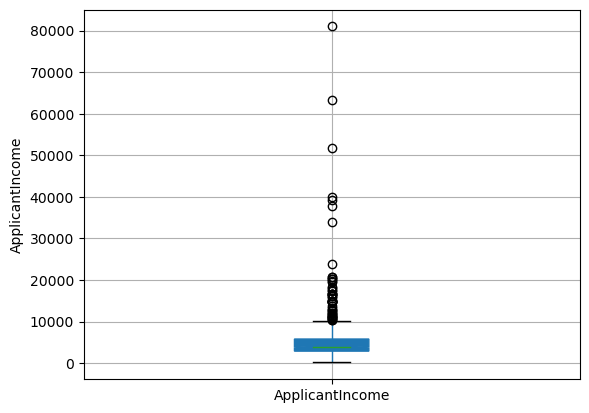

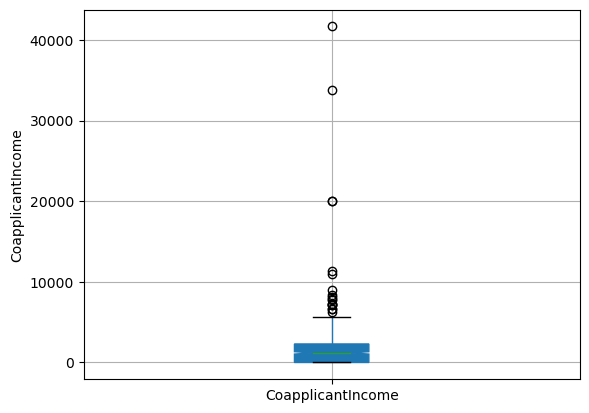

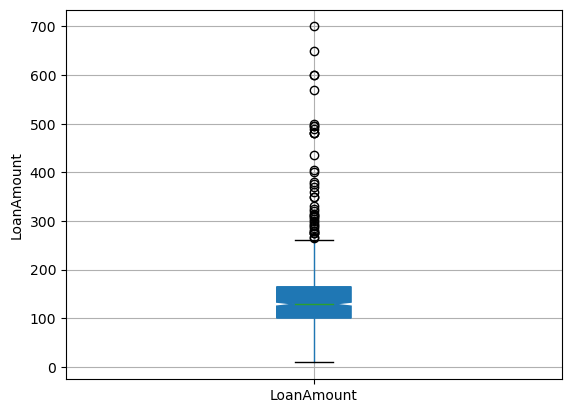

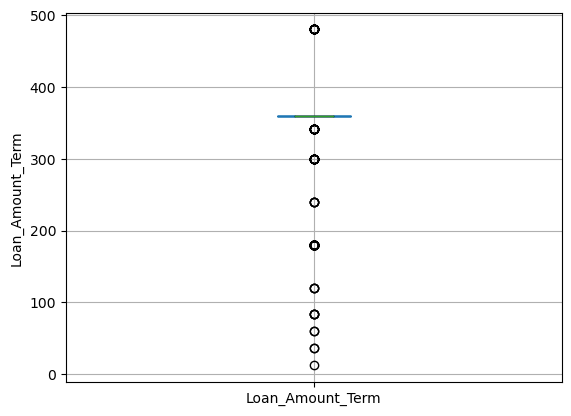

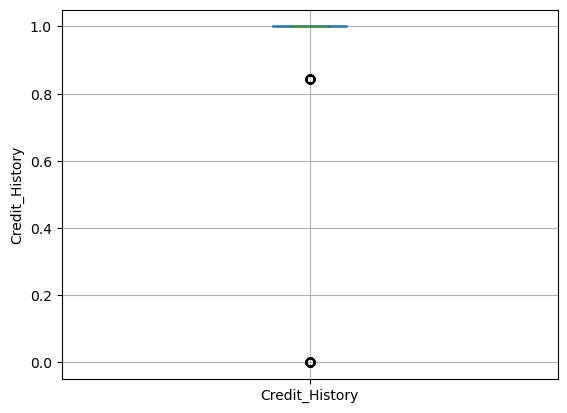

In [13]:
#for numerical distrubition 
for i in df_num:
    df_num.boxplot(column=i,patch_artist = True, notch ='True')
    plt.ylabel(i)
    plt.show()

In [14]:
#we can see that in the numerical data has a outlier. So, we check distrubition of the numerical data

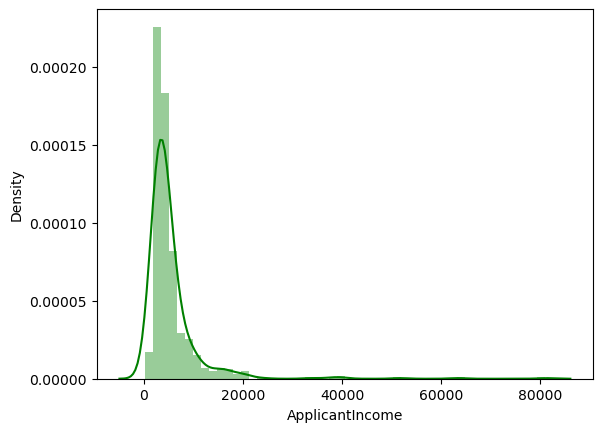

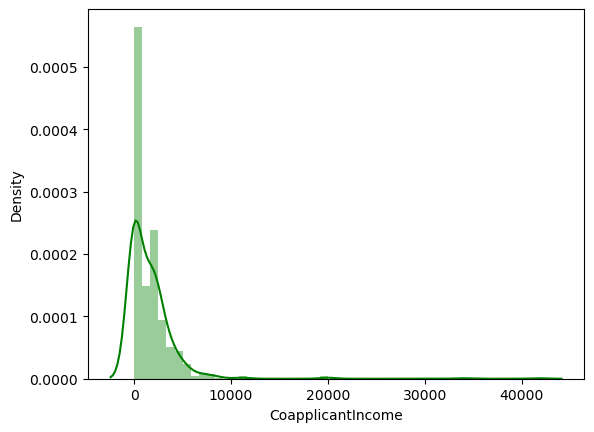

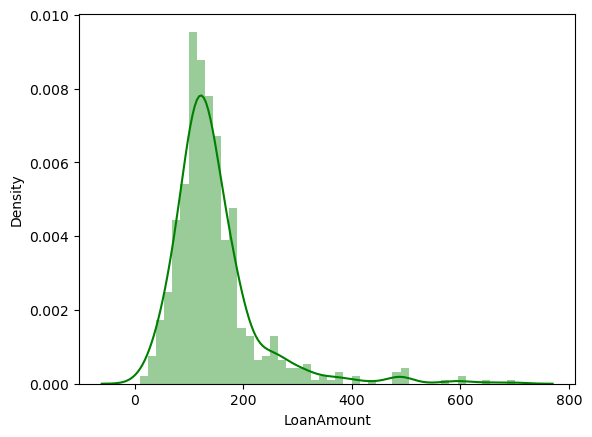

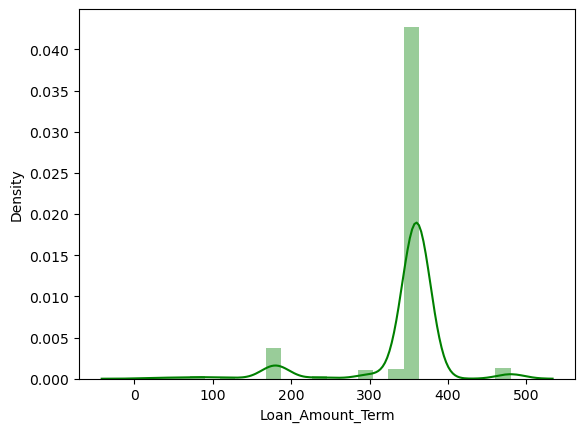

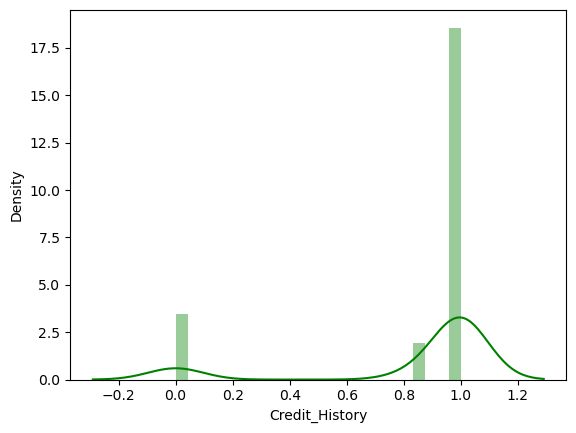

In [15]:
for i in df_num:
    sns.distplot(df[i], kde = True, color = 'green')
    plt.show()

In [16]:
#we can see that in the dataset numerical distrubition in normal. 

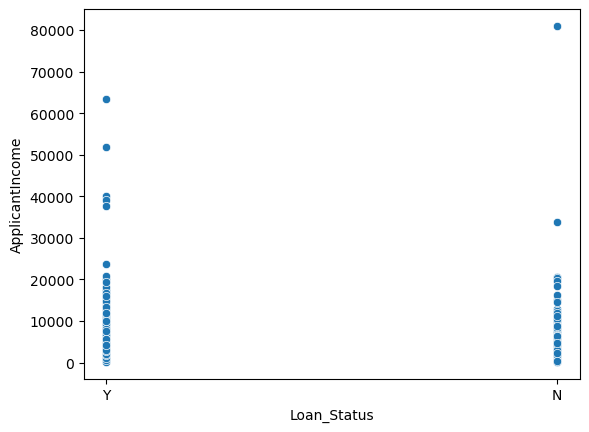

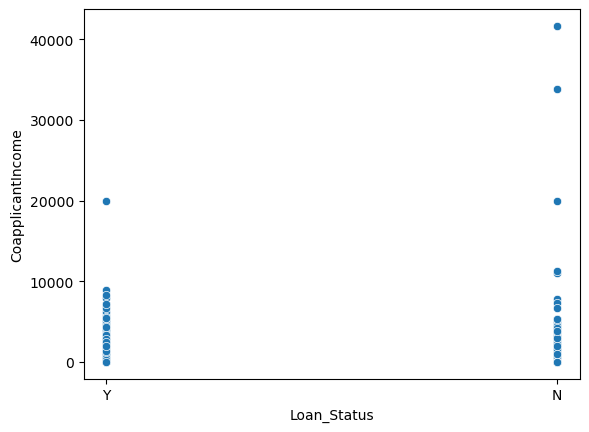

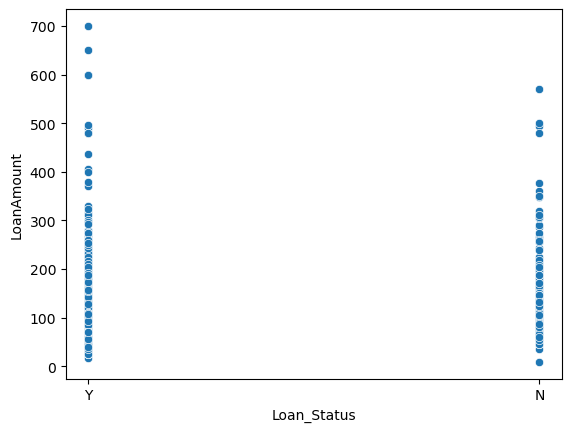

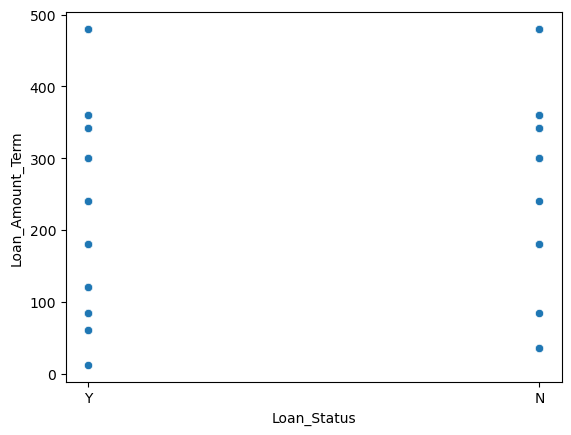

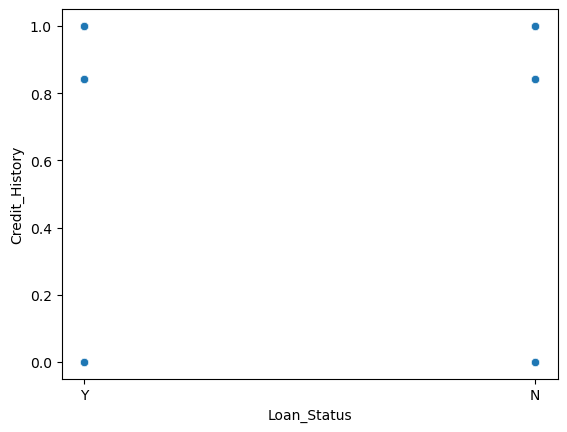

In [17]:
#now we can check the numerical feature and target variable correlation. 
#This also helps in uncovering useful and actionable insights from the data.
#One can also get the outliers from the scatterplots.
for i in df_num:
    sns.scatterplot(df, y=df[i], x=df["Loan_Status"])
    plt.show()

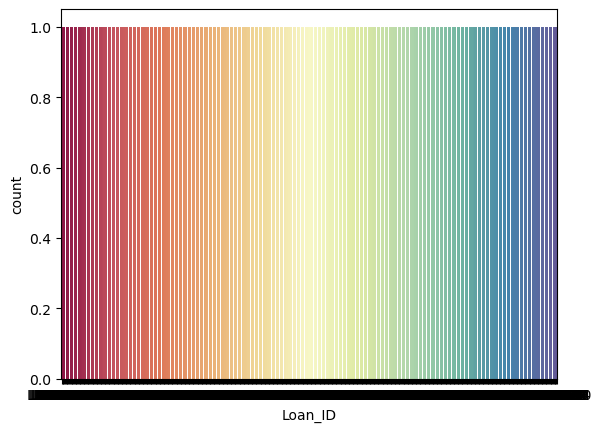

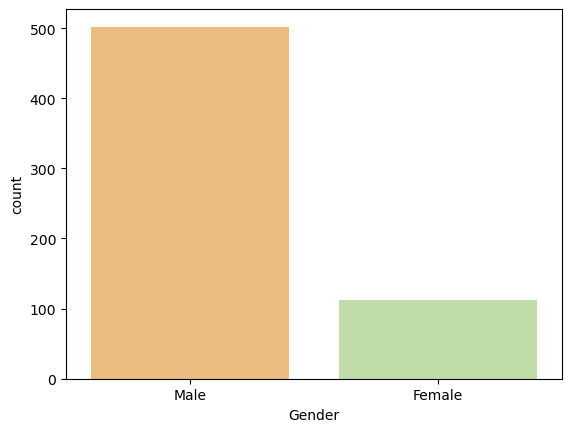

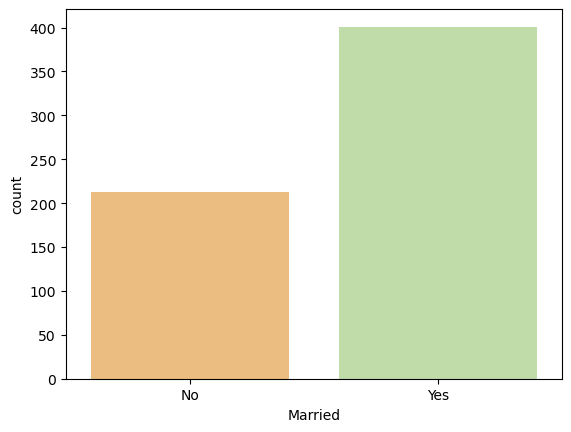

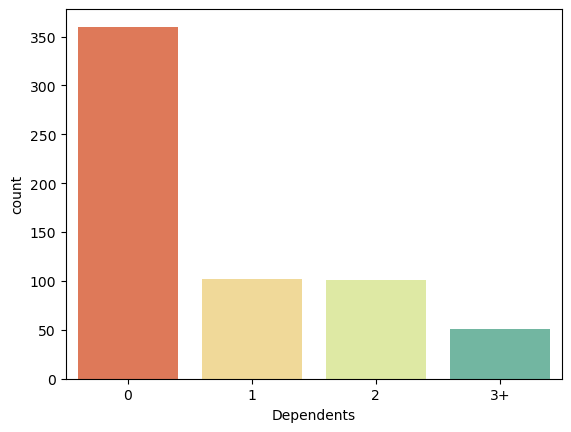

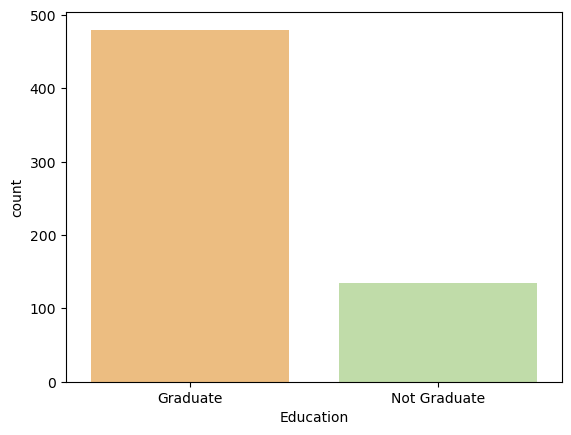

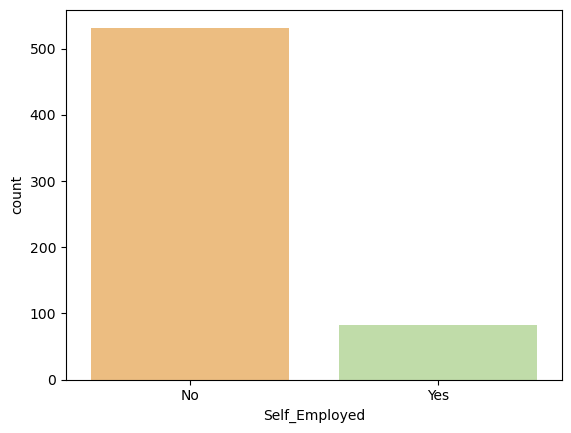

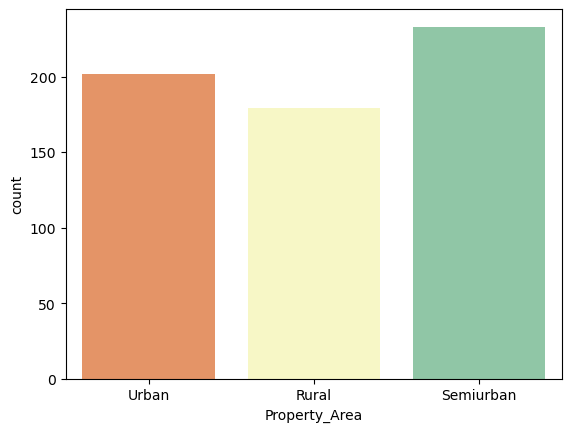

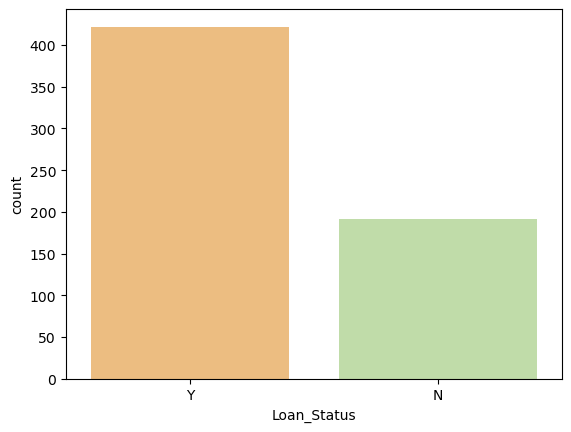

In [18]:
#now let's have look on categorical data distrubition using countplot.
for i in df_cat:
    sns.countplot(x=df[i], palette = "Spectral")
    plt.show()

In [19]:
#we can see that Male ratio is more than female candidate also married people are more compare to Unmarried people.
#In this dataset Undependents are more compare to dependent.
#Graduate people are more required of loan as compare to Non-graduate.
#People are more required loan who has no-employment. And semiurban people more as compare to Urban and Rural

Display and remove the duplicate rows in the Dataframe. 
Duplicate rows increase the computational time of the Machine Learning model and also result in falsely positive results.

In [20]:
df[df.duplicated()]

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status


In [21]:
#In this dataset have not duplicate.

# Seperate data in X and Y as well as Split data into train and Test 

In [22]:
# I am using a df1 data which was copy of the original data set.
x = df1.drop(["Loan_ID", "Loan_Status"], axis=1) # i am droping the loan_id columns because it is noise feature for the model.
y = df1["Loan_Status"] 

In [23]:
#for train test split import neccasary library
from sklearn.model_selection import train_test_split
train_x, test_x, train_y, test_y = train_test_split(x, y, random_state=50, test_size=0.2, stratify=y)

In [24]:
train_x

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
570,Male,Yes,1,Graduate,No,3417,1750.0,186.0,360.0,1.0,Urban
554,Male,Yes,0,Graduate,No,3593,4266.0,132.0,180.0,0.0,Rural
508,Male,Yes,0,Graduate,Yes,2479,3013.0,188.0,360.0,1.0,Urban
99,Male,Yes,0,Graduate,No,1759,3541.0,131.0,360.0,1.0,Semiurban
318,Female,No,1,Graduate,No,3541,0.0,112.0,360.0,NaN,Semiurban
...,...,...,...,...,...,...,...,...,...,...,...
516,Female,Yes,2,Graduate,No,2031,1632.0,113.0,480.0,1.0,Semiurban
165,Male,Yes,0,Graduate,No,3707,3166.0,182.0,NaN,1.0,Rural
254,Male,No,0,Graduate,Yes,16250,0.0,192.0,360.0,0.0,Urban
119,Female,No,0,Graduate,No,10408,0.0,259.0,360.0,1.0,Urban


In [25]:
train_y

570    Y
554    N
508    Y
99     Y
318    Y
      ..
516    Y
165    Y
254    N
119    Y
201    Y
Name: Loan_Status, Length: 491, dtype: object

In [26]:
#we can reset index
train_x.reset_index(inplace=True, drop=True)
test_x.reset_index(inplace=True, drop=True)

train_y.reset_index(inplace=True, drop=True)
test_y.reset_index(inplace=True, drop=True)

In [27]:
#for target variable we encoding it.
from sklearn.preprocessing import LabelEncoder
label = LabelEncoder()
label.fit(train_y)
train_y = label.transform(train_y)
test_y = label.transform(test_y)

In [28]:
train_y

array([1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1,
       1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1,
       0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0,
       0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0,
       0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1,
       0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0,
       1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1,
       0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0,
       1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1,
       1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0,
       0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1,

In [29]:
print(label.inverse_transform(train_y))

['Y' 'N' 'Y' 'Y' 'Y' 'Y' 'Y' 'Y' 'Y' 'Y' 'Y' 'Y' 'Y' 'N' 'Y' 'Y' 'Y' 'N'
 'Y' 'N' 'Y' 'Y' 'Y' 'N' 'N' 'Y' 'Y' 'N' 'N' 'Y' 'N' 'N' 'Y' 'N' 'N' 'Y'
 'N' 'N' 'Y' 'Y' 'N' 'Y' 'Y' 'Y' 'N' 'Y' 'N' 'Y' 'N' 'N' 'Y' 'Y' 'N' 'N'
 'N' 'N' 'Y' 'N' 'Y' 'N' 'Y' 'Y' 'Y' 'Y' 'Y' 'Y' 'Y' 'Y' 'Y' 'Y' 'Y' 'N'
 'Y' 'N' 'Y' 'Y' 'Y' 'Y' 'Y' 'N' 'Y' 'Y' 'N' 'Y' 'Y' 'N' 'N' 'N' 'N' 'N'
 'Y' 'N' 'Y' 'Y' 'Y' 'N' 'N' 'Y' 'Y' 'Y' 'Y' 'Y' 'Y' 'Y' 'Y' 'Y' 'Y' 'Y'
 'N' 'N' 'N' 'Y' 'N' 'Y' 'Y' 'N' 'Y' 'Y' 'Y' 'N' 'N' 'Y' 'Y' 'Y' 'Y' 'Y'
 'Y' 'Y' 'Y' 'Y' 'Y' 'Y' 'Y' 'N' 'Y' 'Y' 'Y' 'Y' 'N' 'N' 'Y' 'N' 'Y' 'Y'
 'Y' 'Y' 'Y' 'Y' 'Y' 'Y' 'Y' 'N' 'Y' 'Y' 'N' 'Y' 'N' 'Y' 'N' 'Y' 'N' 'Y'
 'Y' 'Y' 'N' 'Y' 'Y' 'N' 'Y' 'Y' 'Y' 'Y' 'Y' 'Y' 'Y' 'Y' 'Y' 'Y' 'Y' 'Y'
 'Y' 'Y' 'Y' 'Y' 'Y' 'N' 'Y' 'Y' 'Y' 'Y' 'Y' 'N' 'N' 'Y' 'Y' 'Y' 'Y' 'N'
 'Y' 'N' 'Y' 'Y' 'N' 'Y' 'N' 'Y' 'Y' 'Y' 'N' 'Y' 'Y' 'Y' 'N' 'Y' 'Y' 'Y'
 'N' 'Y' 'Y' 'Y' 'N' 'N' 'Y' 'Y' 'Y' 'N' 'N' 'N' 'N' 'Y' 'Y' 'Y' 'N' 'N'
 'N' 'Y' 'N' 'N' 'Y' 'Y' 'Y' 'N' 'Y' 'Y' 'N' 'Y' 'Y

# Encoding using Catboost encoder

In [30]:
#for create encoding for input variables we can seperate dataof numerical and categorical
train_cat = train_x.select_dtypes(include="object")
train_num = train_x.select_dtypes(include="number")

test_cat = test_x.select_dtypes(include="object")
test_num = test_x.select_dtypes(include="number")

In [31]:
train_cat

,Gender,Married,Dependents,Education,Self_Employed,Property_Area
0,Male,Yes,1,Graduate,No,Urban
1,Male,Yes,0,Graduate,No,Rural
2,Male,Yes,0,Graduate,Yes,Urban
3,Male,Yes,0,Graduate,No,Semiurban
4,Female,No,1,Graduate,No,Semiurban
...,...,...,...,...,...,...
486,Female,Yes,2,Graduate,No,Semiurban
487,Male,Yes,0,Graduate,No,Rural
488,Male,No,0,Graduate,Yes,Urban
489,Female,No,0,Graduate,No,Urban


In [32]:
#First we check null value of dataset. If have then first impute null value.
train_cat.isnull().sum()

Gender           11
Married           3
Dependents       13
Education         0
Self_Employed    29
Property_Area     0
dtype: int64

In [33]:
train_num.isnull().sum()

ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           19
Loan_Amount_Term     12
Credit_History       38
dtype: int64

In [34]:
test_cat.isnull().sum()

Gender           2
Married          0
Dependents       2
Education        0
Self_Employed    3
Property_Area    0
dtype: int64

In [35]:
test_num.isnull().sum()

ApplicantIncome       0
CoapplicantIncome     0
LoanAmount            3
Loan_Amount_Term      2
Credit_History       12
dtype: int64

In [36]:
train_cat.fillna(train_cat.mode().loc[0], inplace = True)
print(train_cat.isnull().sum())

Gender           0
Married          0
Dependents       0
Education        0
Self_Employed    0
Property_Area    0
dtype: int64


In [37]:
train_num.fillna(train_num.mean(), inplace = True)
print(train_num.isnull().sum())

ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
dtype: int64


In [38]:
test_cat.fillna(train_cat.mode().loc[0], inplace = True)
print(test_cat.isnull().sum())

Gender           0
Married          0
Dependents       0
Education        0
Self_Employed    0
Property_Area    0
dtype: int64


In [39]:
test_num.fillna(train_num.mean(), inplace=True)
print(test_num.isnull().sum())

ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
dtype: int64


In [40]:
import category_encoders as ce
encoder = ce.LeaveOneOutEncoder()
encoder.fit(train_cat, train_y)

LeaveOneOutEncoder(cols=['Gender', 'Married', 'Dependents', 'Education',
                         'Self_Employed', 'Property_Area'])

In [41]:
train_cat = encoder.transform(train_cat)
test_cat = encoder.transform(test_cat)

In [42]:
train_cat

,Gender,Married,Dependents,Education,Self_Employed,Property_Area
0,0.690594,0.722222,0.649351,0.701031,0.684086,0.660256
1,0.690594,0.722222,0.680556,0.701031,0.684086,0.613333
2,0.690594,0.722222,0.680556,0.701031,0.700000,0.660256
3,0.690594,0.722222,0.680556,0.701031,0.684086,0.767568
4,0.666667,0.616766,0.649351,0.701031,0.684086,0.767568
...,...,...,...,...,...,...
486,0.666667,0.722222,0.759036,0.701031,0.684086,0.767568
487,0.690594,0.722222,0.680556,0.701031,0.684086,0.613333
488,0.690594,0.616766,0.680556,0.701031,0.700000,0.660256
489,0.666667,0.616766,0.680556,0.701031,0.684086,0.660256


In [43]:
# Now, we concat the both categorical and numerical data
train_x1 = pd.concat([train_num, train_cat], axis=1)
test_x1 = pd.concat([test_num, test_cat], axis=1)

In [44]:
train_x1

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Gender,Married,Dependents,Education,Self_Employed,Property_Area
0,3417,1750.0,186.0,360.000000,1.000000,0.690594,0.722222,0.649351,0.701031,0.684086,0.660256
1,3593,4266.0,132.0,180.000000,0.000000,0.690594,0.722222,0.680556,0.701031,0.684086,0.613333
2,2479,3013.0,188.0,360.000000,1.000000,0.690594,0.722222,0.680556,0.701031,0.700000,0.660256
3,1759,3541.0,131.0,360.000000,1.000000,0.690594,0.722222,0.680556,0.701031,0.684086,0.767568
4,3541,0.0,112.0,360.000000,0.843267,0.666667,0.616766,0.649351,0.701031,0.684086,0.767568
...,...,...,...,...,...,...,...,...,...,...,...
486,2031,1632.0,113.0,480.000000,1.000000,0.666667,0.722222,0.759036,0.701031,0.684086,0.767568
487,3707,3166.0,182.0,343.290188,1.000000,0.690594,0.722222,0.680556,0.701031,0.684086,0.613333
488,16250,0.0,192.0,360.000000,0.000000,0.690594,0.616766,0.680556,0.701031,0.700000,0.660256
489,10408,0.0,259.0,360.000000,1.000000,0.666667,0.616766,0.680556,0.701031,0.684086,0.660256


In [45]:
#check the null value
train_x1.isnull().sum()

ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
Property_Area        0
dtype: int64

In [46]:
test_x1.isnull().sum()

ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
Property_Area        0
dtype: int64

# Scaling Using Robustscaler

In [47]:
from sklearn.preprocessing import MinMaxScaler, StandardScaler, RobustScaler
scaler = RobustScaler()
scaler.fit(train_x1)

RobustScaler()

In [48]:
train_x1 = pd.DataFrame(scaler.transform(train_x1), columns=train_x1.columns)
test_x1 = pd.DataFrame(scaler.transform(test_x1), columns=test_x1.columns)

In [49]:
train_x1

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Gender,Married,Dependents,Education,Self_Employed,Property_Area
0,-0.148812,0.210728,0.785714,0.000000,0.000000,0.000000,0.0,-0.031205,0.0,0.000000,0.000000
1,-0.090350,1.281822,0.014286,-180.000000,-1.000000,0.000000,0.0,0.000000,0.0,0.000000,-0.304233
2,-0.460389,0.748404,0.814286,0.000000,0.000000,0.000000,0.0,0.000000,0.0,0.015914,0.000000
3,-0.699552,0.973180,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.0,0.000000,0.695767
4,-0.107623,-0.534270,-0.271429,0.000000,-0.156733,-0.023927,-1.0,-0.031205,0.0,0.000000,0.695767
...,...,...,...,...,...,...,...,...,...,...,...
486,-0.609201,0.160494,-0.257143,120.000000,0.000000,-0.023927,0.0,0.078481,0.0,0.000000,0.695767
487,-0.052483,0.813538,0.728571,-16.709812,0.000000,0.000000,0.0,0.000000,0.0,0.000000,-0.304233
488,4.113935,-0.534270,0.871429,0.000000,-1.000000,0.000000,-1.0,0.000000,0.0,0.015914,0.000000
489,2.173393,-0.534270,1.828571,0.000000,0.000000,-0.023927,-1.0,0.000000,0.0,0.000000,0.000000


# Model Building And Evaluation

In [50]:
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
import xgboost as Xgb

In [51]:
from sklearn.metrics import classification_report, accuracy_score, precision_score, recall_score, f1_score, confusion_matrix

In [52]:
#lOGISTIC REGRESSION
log_model = LogisticRegression(random_state=50)
log_model.fit(train_x1, train_y)
pred_log = log_model.predict(test_x1)
print(classification_report(test_y, pred_log))

              precision    recall  f1-score   support

           0       0.89      0.45      0.60        38
           1       0.80      0.98      0.88        85

    accuracy                           0.81       123
   macro avg       0.85      0.71      0.74       123
weighted avg       0.83      0.81      0.79       123



In [53]:
log_model.score(train_x1, train_y)

0.8105906313645621

In [54]:
log_model.score(test_x1, test_y)

0.8130081300813008

In [55]:
#KNEARASTNEIGHBORS CLASSIFIER
knn_model = KNeighborsClassifier(n_neighbors=10)
knn_model.fit(train_x1, train_y)
pred_knn = knn_model.predict(test_x1)
print(classification_report(test_y, pred_knn))

              precision    recall  f1-score   support

           0       0.67      0.42      0.52        38
           1       0.78      0.91      0.84        85

    accuracy                           0.76       123
   macro avg       0.72      0.66      0.68       123
weighted avg       0.74      0.76      0.74       123



In [56]:
# NAIVE BAYES CLASSIFICATION
nbc_model = GaussianNB()
nbc_model.fit(train_x1, train_y)
pred_nbc = nbc_model.predict(test_x1)
print(classification_report(test_y, pred_nbc))

              precision    recall  f1-score   support

           0       0.81      0.45      0.58        38
           1       0.79      0.95      0.87        85

    accuracy                           0.80       123
   macro avg       0.80      0.70      0.72       123
weighted avg       0.80      0.80      0.78       123



In [57]:
# SUPPORT VECTOR CLASSIFICATION
svm_model = SVC(kernel="rbf")
svm_model.fit(train_x1, train_y)
pred_svm = svm_model.predict(test_x1)
print(classification_report(test_y, pred_svm))

              precision    recall  f1-score   support

           0       0.50      0.03      0.05        38
           1       0.69      0.99      0.82        85

    accuracy                           0.69       123
   macro avg       0.60      0.51      0.43       123
weighted avg       0.63      0.69      0.58       123



In [58]:
#DECISION TREE CLASSIFICATION 
dt_model = DecisionTreeClassifier(random_state=50, criterion="gini")
dt_model.fit(train_x1, train_y)
pred_dt = dt_model.predict(test_x1)
print(classification_report(test_y, pred_dt))

              precision    recall  f1-score   support

           0       0.64      0.55      0.59        38
           1       0.81      0.86      0.83        85

    accuracy                           0.76       123
   macro avg       0.72      0.71      0.71       123
weighted avg       0.76      0.76      0.76       123



In [59]:
#RANDOM FOREST CLASSIFICATION
rfc_model = RandomForestClassifier(random_state=50)
rfc_model.fit(train_x1, train_y)
pred_rfc = rfc_model.predict(test_x1)
print(classification_report(test_y, pred_rfc))

              precision    recall  f1-score   support

           0       0.67      0.47      0.55        38
           1       0.79      0.89      0.84        85

    accuracy                           0.76       123
   macro avg       0.73      0.68      0.70       123
weighted avg       0.75      0.76      0.75       123



In [60]:
#XGBOOST CLASSIFICATION
xgb_model = Xgb.XGBClassifier(n_estimators=100)
xgb_model.fit(train_x1, train_y)
pred_xgb = xgb_model.predict(test_x1)
print(classification_report(test_y, pred_xgb))

              precision    recall  f1-score   support

           0       0.69      0.53      0.60        38
           1       0.81      0.89      0.85        85

    accuracy                           0.78       123
   macro avg       0.75      0.71      0.72       123
weighted avg       0.77      0.78      0.77       123



In [61]:
#ADABOOST CLASSIFICATION
from sklearn.ensemble import AdaBoostClassifier
adb_model = AdaBoostClassifier(random_state=50)
adb_model.fit(train_x1, train_y)
pred_adb = adb_model.predict(test_x1)
print(classification_report(test_y, pred_adb))

              precision    recall  f1-score   support

           0       0.65      0.45      0.53        38
           1       0.78      0.89      0.84        85

    accuracy                           0.76       123
   macro avg       0.72      0.67      0.68       123
weighted avg       0.74      0.76      0.74       123



In [62]:
#HYPERPERAMETER TUNING OF LOGISTIC REGRESSOR
from sklearn.model_selection import GridSearchCV
log = LogisticRegression()
params = { "tol" : [0.1,0.5,0.8,0.9], "C" :[1,2,8,6,9],
          "solver": ['lbfgs', "liblinear", "newton-cg", "newton-cholesky", "sag", "saga"]}
clf1 = GridSearchCV(log, params, cv=5, scoring="precision")
clf1.fit(train_x1, train_y)
print(clf1.best_params_)
print(clf1.best_score_)

{'C': 1, 'solver': 'newton-cholesky', 'tol': 0.8}
0.7906683270890702


In [63]:
log_model1 = LogisticRegression(C=1, solver="newton-cholesky", tol=0.8)
log_model1.fit(train_x1, train_y)
pred_log1 = log_model1.predict(test_x1)
preci_log= precision_score(test_y, pred_log1)
preci_log

0.7904761904761904

In [64]:
#HYPERPERAMETER TUING OF KNN
knn =KNeighborsClassifier()
params_knn= {'algorithm' :['auto', 'ball_tree', 'kd_tree', 'brute'], 'weights': ['uniform', 'distance'], 
         "n_neighbors" : [1,25,14,13,26,85,45]}
clf2 = GridSearchCV(knn, params_knn, cv=5, scoring="precision")
clf2.fit(train_x1, train_y)
print(clf2.best_params_)
print(clf2.best_score_)

{'algorithm': 'auto', 'n_neighbors': 1, 'weights': 'uniform'}
0.7733395017668594


In [65]:
knn_model1 = KNeighborsClassifier(algorithm="auto", weights="uniform")
knn_model1.fit(train_x1, train_y)
pred_knn1 = knn_model1.predict(test_x1)
preci_knn= precision_score(test_y, pred_knn1)
preci_knn

0.8105263157894737

In [66]:
#HYPERPERAMETER TUNING OF NB
nb = GaussianNB()
params_nb = {'var_smoothing' : [0.96,0.25,0.30,0.40, 0.50]}
clf3 = GridSearchCV(nb, params_nb, cv=5, scoring="precision")
clf3.fit(train_x1, train_y)
print(clf3.best_params_)
print(clf3.best_score_)

{'var_smoothing': 0.96}
0.6850699292525508


In [67]:
#HYPERPERAMETER TUNING OF SUPPORT VECTOR 
svm = SVC()
params_svm = {"gamma" :["scale", "auto"]}
clf4 = GridSearchCV(svm, params_svm, cv=5, scoring="precision")
clf4.fit(train_x1, train_y)
print(clf4.best_params_)
print(clf4.best_score_)

{'gamma': 'auto'}
0.7718397347986292


In [68]:
#HYPERPERAMETER TUNING OF DECISION TREE 
dt = DecisionTreeClassifier()
params_dt = {'criterion':['gini', 'entropy', 'log_loss'], 'max_depth' :[1,25,14,13,45,75,26],'splitter':['best', 'random']}
clf5 = GridSearchCV(dt, params_dt, cv=5, scoring="accuracy")
clf5.fit(train_x1, train_y)
print(clf5.best_params_)
print(clf5.best_score_)

{'criterion': 'gini', 'max_depth': 1, 'splitter': 'best'}
0.810513296227582


In [69]:
dt_model1 = DecisionTreeClassifier(criterion="gini",max_depth=1, splitter="best")
dt_model1.fit(train_x1, train_y)
pred_dt1 = dt_model1.predict(test_x1)
preci_dt= precision_score(test_y, pred_dt1)
preci_dt

0.7904761904761904

In [70]:
#HYPERPERAMETER TUNING OF RANDOMFOREST 
rfc = RandomForestClassifier()
params_rfc = {"n_estimators" : [10,15,125,10,8,85],"max_depth" : [10,25,48,85,42,3]}
clf6 = GridSearchCV(rfc, params_rfc, cv=5, scoring="precision")
clf6.fit(train_x1, train_y)
print(clf6.best_params_)
print(clf6.best_score_)

{'max_depth': 48, 'n_estimators': 10}
0.8074446223186336


In [115]:
rfc_model1 = RandomForestClassifier(max_depth=42, n_estimators = 10)
rfc_model1.fit(train_x1, train_y)
pred_rfc1 = rfc_model1.predict(test_x1)
precision= precision_score(test_y, pred_rfc1)
precision

0.8222222222222222

In [72]:
#HYPERPERAMETER TUNING OF XGBOOST
xgb = Xgb.XGBClassifier()
params_xgb = {'eta': [0.1, 0.2, 0.3,0.4,0.5], 'n_estimators' : [10, 50, 100,12,15], 'max_depth': [3, 6, 9,14]}
clf7 = GridSearchCV(xgb, params_xgb, cv=5, scoring="precision")
clf7.fit(train_x1, train_y)
print(clf7.best_params_)
print(clf7.best_score_)

{'eta': 0.4, 'max_depth': 14, 'n_estimators': 50}
0.7990901323955809


In [73]:
xgb_model1 = Xgb.XGBClassifier(eta= 0.4,max_depth=14, n_estimators = 50)
xgb_model1.fit(train_x1, train_y)
pred_xgb1 = xgb_model1.predict(test_x1)
preci_xgb= precision_score(test_y, pred_xgb1)
preci_xgb

0.8172043010752689

In [74]:
#HYPERPERAMETER TUNING OF ADABOOST
adb = AdaBoostClassifier()
params_adb = {'n_estimators' : [10, 50, 100,12,15]}
clf8 = GridSearchCV(xgb, params_adb, cv=5, scoring="precision")
clf8.fit(train_x1, train_y)
print(clf8.best_params_)
print(clf8.best_score_)

{'n_estimators': 50}
0.797107388724977


In [75]:
adb_model1 = AdaBoostClassifier(n_estimators = 50)
adb_model1.fit(train_x1, train_y)
pred_adb1 = adb_model1.predict(test_x1)
preci_adb= precision_score(test_y, pred_adb1)
preci_adb

0.7835051546391752

In [76]:
#best perameter for model
print("LogisticRegression score is :", clf1.best_params_)
print("KNeighborsClassifier score is :", clf2.best_params_)
print("GaussianNB score is :", clf3.best_params_)
print("Support vector machine score is :", clf4.best_params_)
print("DecisionTreeClassifier score is :", clf5.best_params_)
print("RandomForestClassifier score is :", clf6.best_params_)
print("XGBOOST score is :", clf7.best_params_)
print("AdaBoostClassifier score is :", clf8.best_params_)

LogisticRegression score is : {'C': 1, 'solver': 'newton-cholesky', 'tol': 0.8}
KNeighborsClassifier score is : {'algorithm': 'auto', 'n_neighbors': 1, 'weights': 'uniform'}
GaussianNB score is : {'var_smoothing': 0.96}
Support vector machine score is : {'gamma': 'auto'}
DecisionTreeClassifier score is : {'criterion': 'gini', 'max_depth': 1, 'splitter': 'best'}
RandomForestClassifier score is : {'max_depth': 48, 'n_estimators': 10}
XGBOOST score is : {'eta': 0.4, 'max_depth': 14, 'n_estimators': 50}
AdaBoostClassifier score is : {'n_estimators': 50}


In [77]:
#Score for all model
print("LogisticRegression score is :", clf1.best_score_)
print("KNeighborsClassifier score is :", clf2.best_score_)
print("GaussianNB score is :", clf3.best_score_)
print("Support vector machine score is :", clf4.best_score_)
print("DecisionTreeClassifier score is :", clf5.best_score_)
print("RandomForestClassifier score is :", clf6.best_score_)
print("XGBOOST score is :", clf7.best_score_)
print("AdaBoostClassifier score is :", clf8.best_score_)

LogisticRegression score is : 0.7906683270890702
KNeighborsClassifier score is : 0.7733395017668594
GaussianNB score is : 0.6850699292525508
Support vector machine score is : 0.7718397347986292
DecisionTreeClassifier score is : 0.810513296227582
RandomForestClassifier score is : 0.8074446223186336
XGBOOST score is : 0.7990901323955809
AdaBoostClassifier score is : 0.797107388724977


In [116]:
print("LogisticRegression score is :", preci_log)
print("KNeighborsClassifier score is :", preci_knn)
print("DecisionTreeClassifier score is :", preci_dt)
print("RandomForestClassifier score is :", precision)
print("XGBOOST score is :", preci_xgb)
print("AdaBoostClassifier score is :", preci_adb)

LogisticRegression score is : 0.7904761904761904
KNeighborsClassifier score is : 0.8105263157894737
DecisionTreeClassifier score is : 0.7904761904761904
RandomForestClassifier score is : 0.8222222222222222
XGBOOST score is : 0.8172043010752689
AdaBoostClassifier score is : 0.7835051546391752


# Feature Selection

In [79]:
corr = train_x1.corr()
corr.style.background_gradient(cmap='coolwarm')

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Gender,Married,Dependents,Education,Self_Employed,Property_Area
ApplicantIncome,1.000000,-0.125491,0.566808,-0.066053,-0.027451,0.060692,0.064518,-0.094582,0.147682,0.107226,-0.013456
CoapplicantIncome,-0.125491,1.000000,0.167810,-0.062652,0.009142,0.058983,0.057264,0.019844,0.054239,-0.020712,-0.016783
LoanAmount,0.566808,0.167810,1.000000,0.023619,-0.013676,0.094901,0.148822,-0.048331,0.163636,0.109723,-0.023429
Loan_Amount_Term,-0.066053,-0.062652,0.023619,1.000000,-0.005234,-0.054418,-0.133954,0.040067,0.010077,0.010791,0.023255
Credit_History,-0.027451,0.009142,-0.013676,-0.005234,1.000000,0.047174,0.019078,0.035569,0.030231,-0.013552,0.021656
Gender,0.060692,0.058983,0.094901,-0.054418,0.047174,1.000000,0.376157,0.075569,-0.042584,-0.024360,-0.112824
Married,0.064518,0.057264,0.148822,-0.133954,0.019078,0.376157,1.000000,0.130047,-0.010903,-0.014650,-0.034772
Dependents,-0.094582,0.019844,-0.048331,0.040067,0.035569,0.075569,0.130047,1.000000,-0.045793,-0.033503,-0.059043
Education,0.147682,0.054239,0.163636,0.010077,0.030231,-0.042584,-0.010903,-0.045793,1.000000,0.024098,0.092088
Self_Employed,0.107226,-0.020712,0.109723,0.010791,-0.013552,-0.024360,-0.014650,-0.033503,0.024098,1.000000,0.012884


In [80]:
def correlation(dataset, threshold):
    col_corr = set()
    corr_matrix = dataset.corr()
    for i in range (len(corr_matrix.columns)):
        for j in range(i):
            if abs(corr_matrix.iloc[i,j]) > threshold:
                colname = corr_matrix.columns[i]
                col_corr.add(colname)
    return col_corr

In [81]:
corr_features = correlation(train_x1, 0.7)
len(set(corr_features))

0

Here in this dataset have no correlation of each other.

In [118]:
print("Best Score Here of Hyperperameter:")
print('RandomForestClassifier score is:', clf6.best_score_)
print('XGBClassifier score is:', clf7.best_score_)

Best Score Here of Hyperperameter:
RandomForestClassifier score is: 0.8074446223186336
XGBClassifier score is: 0.7990901323955809


In [117]:
print("Best score of model after Hyperperameter")
print("RandomForestClassifier score is :", precision)
print("XGBOOST score is :", preci_xgb)

Best score of model after Hyperperameter
RandomForestClassifier score is : 0.8222222222222222
XGBOOST score is : 0.8172043010752689


In [84]:
from sklearn.metrics import ConfusionMatrixDisplay

RandomForestClassifier of confusion_matrix is:


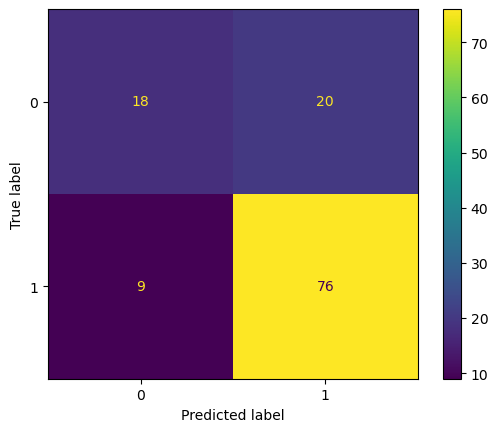

In [85]:
print('RandomForestClassifier of confusion_matrix is:')
print(ConfusionMatrixDisplay.from_predictions(test_y, pred_rfc1))

XGBClassifier of confusion_matrix is:


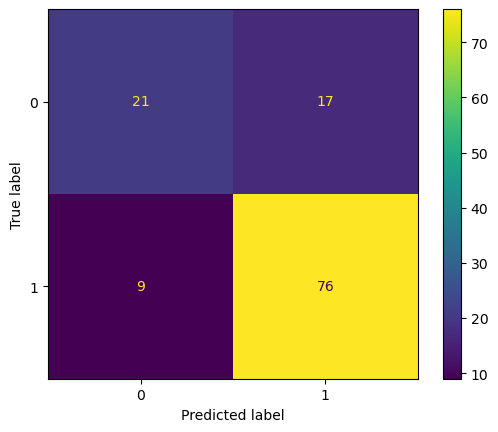

In [86]:
print('XGBClassifier of confusion_matrix is:')
print(ConfusionMatrixDisplay.from_predictions(test_y, pred_xgb1))

In [87]:
#Now, testing the new data for checking 
df2
new_df={"Gender": "Male", "Married":"No", "Dependents":"1", "Education": "Graduate", "Self_Employed": "Yes", 
        "ApplicantIncome" : 8500,'CoapplicantIncome': 1900,  'LoanAmount' : 150,'Loan_Amount_Term' : 360,
       'Credit_History': 1,'Property_Area' : "Rural"}
index = [0]

In [88]:
new_df = pd.DataFrame(new_df,index=index)

In [89]:
new_df

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,Male,No,1,Graduate,Yes,8500,1900,150,360,1,Rural


In [90]:
new_cat = new_df.select_dtypes(include="object")
new_num = new_df.select_dtypes(include="number")

In [91]:
new_cat = encoder.transform(new_cat)

In [92]:
new_cat

,Gender,Married,Dependents,Education,Self_Employed,Property_Area
0,0.690594,0.616766,0.649351,0.701031,0.7,0.613333


In [93]:
new_df = pd.concat([new_num, new_cat], axis=1)

In [94]:
new_df

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Gender,Married,Dependents,Education,Self_Employed,Property_Area
0,8500,1900,150,360,1,0.690594,0.616766,0.649351,0.701031,0.7,0.613333


In [95]:
new_df =pd.DataFrame(scaler.transform(new_df), columns=new_df.columns)

In [96]:
new_df

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Gender,Married,Dependents,Education,Self_Employed,Property_Area
0,1.539611,0.274585,0.271429,0.0,0.0,0.0,-1.0,-0.031205,0.0,0.015914,-0.304233


In [97]:
prediction1 = rfc_model1.predict(new_df)
prediction1

array([1])

In [98]:
if prediction1 ==1:
    print("Loan pass")
else:
    print("Loan Not Pass")
print(label.inverse_transform(prediction1))


Loan pass
['Y']


In [99]:
#Now, testing the new data for checking 
new_df1={"Gender": "Female", "Married":"Yes", "Dependents":"0", "Education": "Graduate", "Self_Employed": "No", 
        "ApplicantIncome" : 5600,'CoapplicantIncome': 0,  'LoanAmount' : 185,'Loan_Amount_Term' : 360,
       'Credit_History': 1,'Property_Area' : "Rural"}
index = [0]

In [100]:
new_df1 = pd.DataFrame(new_df1, index=index)

In [101]:
new_df1

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,Female,Yes,0,Graduate,No,5600,0,185,360,1,Rural


In [102]:
new_cat1 = new_df1.select_dtypes(include="object")
new_num1 = new_df1.select_dtypes(include="number")

In [103]:
new_cat1 = encoder.transform(new_cat1)

In [104]:
new_cat1

,Gender,Married,Dependents,Education,Self_Employed,Property_Area
0,0.666667,0.722222,0.680556,0.701031,0.684086,0.613333


In [105]:
new_df1 = pd.concat([new_num1, new_cat1], axis=1)

In [106]:
new_df1

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Gender,Married,Dependents,Education,Self_Employed,Property_Area
0,5600,0,185,360,1,0.666667,0.722222,0.680556,0.701031,0.684086,0.613333


In [107]:
new_df1 = pd.DataFrame(scaler.transform(new_df1), columns=new_df1.columns)

In [108]:
new_df1

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Gender,Married,Dependents,Education,Self_Employed,Property_Area
0,0.576316,-0.53427,0.771429,0.0,0.0,-0.023927,0.0,0.0,0.0,0.0,-0.304233


In [109]:
prediction2 = rfc_model.predict(new_df1)
prediction2

array([1])

In [110]:
if prediction2 ==1:
    print("Loan pass")
else:
    print("Loan Not Pass")
print(label.inverse_transform(prediction2))

Loan pass
['Y']


CONCLUSION : From the above all Different Model Random Forest Classification have generated the model with higher accuracy in both defulat model and Hyperperameter tuning. In this Model have no correlation with each other.
Here RandomForestClassifier score is : 0.8222222222222222
